<a href="https://colab.research.google.com/github/kattasrujana/Assignment1/blob/main/Copy_of_new_cats%26dogs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [ ]:
!kaggle datasets download -d salader/dogs-vs-cats

 99% 1.06G/1.06G [00:07<00:00, 197MB/s]
100% 1.06G/1.06G [00:07<00:00, 162MB/s]


In [ ]:
import zipfile
zip_ref=zipfile.ZipFile('/content/dogs-vs-cats.zip')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

In [ ]:
#generators -create batches
train_ds=keras.utils.image_dataset_from_directory(
    directory='/content/train',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256,256)
)
validation_ds=keras.utils.image_dataset_from_directory(
    directory='/content/test',
    labels= 'inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [ ]:
#normalize
def process(image,label):
  image=tf.cast(image/255.,tf.float32)
  return image,label
train_ds=train_ds.map(process)
validation_ds=validation_ds.map(process)

In [ ]:
#creating CNN model
model=Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))



In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 254, 254, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Bat  (None, 125, 125, 64)      256       
 chNormalization)                                                
                                                        

In [ ]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
history=model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
625/625 [==============================] - 2313s 4s/step - loss: 1.7387 - accuracy: 0.5661 - val_loss: 0.6363 - val_accuracy: 0.6294
Epoch 2/10
625/625 [==============================] - 2288s 4s/step - loss: 0.6442 - accuracy: 0.6331 - val_loss: 0.7447 - val_accuracy: 0.6426
Epoch 3/10
625/625 [==============================] - 2322s 4s/step - loss: 0.5635 - accuracy: 0.6948 - val_loss: 0.6247 - val_accuracy: 0.6620
Epoch 4/10
625/625 [==============================] - 2285s 4s/step - loss: 0.4977 - accuracy: 0.7467 - val_loss: 0.5299 - val_accuracy: 0.7434
Epoch 5/10
625/625 [==============================] - 2281s 4s/step - loss: 0.4526 - accuracy: 0.7750 - val_loss: 0.4956 - val_accuracy: 0.7630
Epoch 6/10
625/625 [==============================] - 2257s 4s/step - loss: 0.3908 - accuracy: 0.8033 - val_loss: 0.7772 - val_accuracy: 0.6304
Epoch 7/10
625/625 [==============================] - 2272s 4s/step - loss: 0.3370 - accuracy: 0.8329 - val_loss: 0.5074 - val_accuracy:

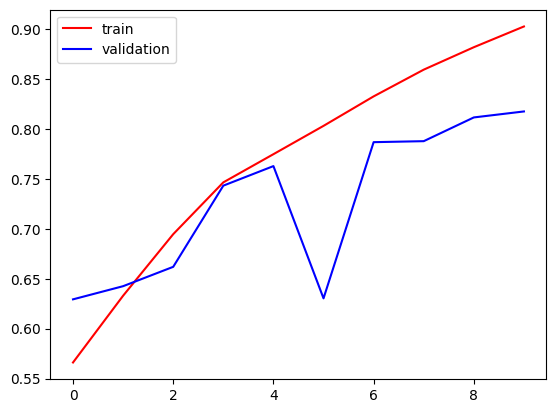

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

In [ ]:
#need to reduce complexity
#add more data
#reducing complexity

In [ ]:
import cv2

In [ ]:
test_image=cv2.imread('/content/cat.jpg')

In [ ]:
test_image.shape

(499, 489, 3)

In [ ]:
test_image=cv2.resize(test_image,(256,256))

In [ ]:
test_input=test_image.reshape(1,256,256,3)

In [ ]:
model.predict(test_input)

1/1 [==============================] - 0s 41ms/step


array([[0.]], dtype=float32)